In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diamonds.zip')
df.drop('Unnamed: 0', axis=1,inplace=True)

In [16]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
# oe = OrdinalEncoder()
# df['cut'] = oe.fit_transform(df['cut'].values.reshape(-1, 1))
# df['color'] = oe.fit_transform(df['color'].values.reshape(-1, 1))
# df['clarity'] = oe.fit_transform(df['clarity'].values.reshape(-1, 1))

In [18]:
cut = pd.Categorical(df['cut'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=True)
color = pd.Categorical(df['color'], categories=['G', 'E' , 'F' , 'H' , 'D' , 'I', 'J'], ordered=True)
clarity = pd.Categorical(df['clarity'], categories=['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], ordered=True)

In [20]:
labels_1, unique = pd.factorize(cut, sort=True)
df['cut'] = labels_1

labels_2, unique = pd.factorize(color, sort=True)
df['color'] = labels_2

labels_3, unique = pd.factorize(clarity, sort=True)
df['clarity'] = labels_3


In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
df['cut'].value_counts()

0    21551
1    13791
2    12082
3     4906
4     1610
Name: cut, dtype: int64

In [ ]:
# cut_dict = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair':1}
# color_dict = {'G':7, 'E':6 , 'F':5 , 'H':4 , 'D':3 , 'I':2, 'J':1 }
# clarity_dict = {'SI1':, 'VS2':, 'SI2':, 'VS1':, 'VVS2':, 'VVS1':, 'IF':, 'I1':}

In [23]:
X = df.drop('price',axis=1)
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
from sklearn import metrics

In [35]:
def machine_learning_score(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    predictions = regressor.predict(X_test)
    print(f"Mean absolute error: {metrics.mean_absolute_error(y_test,predictions)}")
    print(f"Mean squared error: {metrics.mean_squared_error(y_test,predictions)}")
    print(f"Root Mean squared error: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")
    print(f"The explained variance score: {metrics.explained_variance_score(y_test,predictions)}")
#     sns.scatterplot(x=y_test,y=predictions)
    sns.distplot((y_test-predictions),bins=50)

Mean absolute error: 866.0321030757646
Mean squared error: 2017484.3481081466
Root Mean squared error: 1420.3817613966137
The explained variance score: 0.8706565131033882


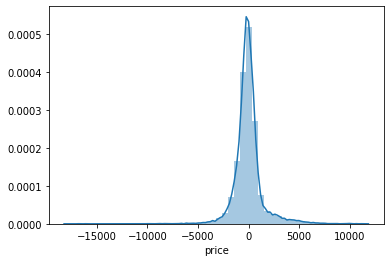

In [36]:
# linear regression

lr = LinearRegression()
machine_learning_score(lr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean absolute error: 1846.8294620860268
Mean squared error: 11656003.418338217
Root Mean squared error: 3414.088958761651
The explained variance score: 0.352960025649531


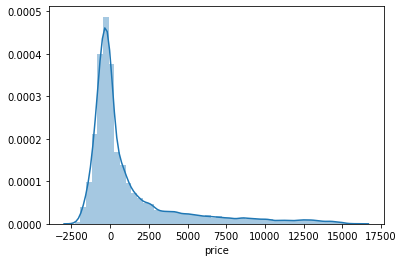

In [30]:
# Support Vector Machine

svr = SVR()
machine_learning_score(svr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 487.5088864170065
Mean squared error: 816925.6706612285
Root Mean squared error: 903.8394053487757
The explained variance score: 0.9477895554967332


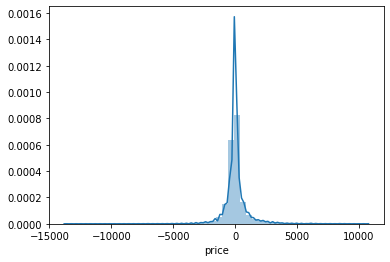

In [31]:
# k nearest neighbor
knr = KNeighborsRegressor()
machine_learning_score(knr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 361.2165059943147
Mean squared error: 535782.1589574836
Root Mean squared error: 731.9714194949715
The explained variance score: 0.9656473470659408


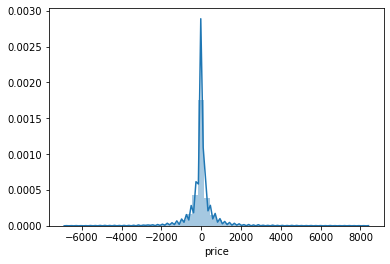

In [32]:
# decision tree
dtree = DecisionTreeRegressor()
machine_learning_score(dtree,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean absolute error: 285.53941217755175
Mean squared error: 321448.179200672
Root Mean squared error: 566.9640016797116
The explained variance score: 0.979396531552588


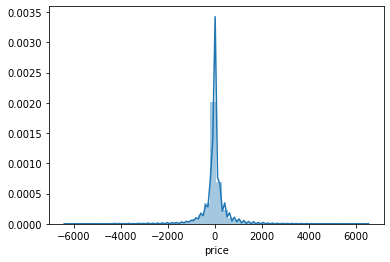

In [33]:
# random forest regressor
rfr = RandomForestRegressor()
machine_learning_score(rfr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)